# Enriching Wine Data with Fire Data and Using Linear Regression

As a consumer, we want to find high quality wines from California. We would like to see if there are specific factors that impact the ratings of these wines. By running linear regression on our dataset, we can find out if there is a correlation between features of the wine and its rating. 

Within our dataset, we can only run linear regression on the vintage and price of the wines, so we plan to enrich our data with potential latent variables. Since one of California's major natural disasters are wildfires, we plan to see if these fires effect the ratings of the wines. To join these datasets, we will join by the county and the year the fire happened and the vintage of the wine. 


In [4]:
import pandas as pd
import numpy as np
import pylab as pl

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import warnings
%matplotlib inline

In [5]:
# Load the cleaned data into dataframe

""" 
    Information of cleaned dataset:
    
    - Province and Variety of wine is transfomed from a categorical attribute to numerical attribute
    - Vintage of wine is extracted from the title of each wine
    - Rows were removed if there were null values present within each of the three attributes (Province, Variety, Vintage)
    
"""
warnings.simplefilter('ignore')
data = pd.read_csv("../data/California_Wines.csv")
data.dropna(inplace = True)
print(data.shape)
data.head()

(12638, 18)


,Unnamed: 0,Unnamed: 0.1,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,province_id,variety_numerical,vintage
0,10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,7,80,2011
3,23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,7,326,2011
4,25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,7,440,2011
12,60,60,US,"Syrupy and dense, this wine is jammy in plum a...",Estate,86,100.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Okapi 2013 Estate Cabernet Sauvignon (Napa Val...,Cabernet Sauvignon,Okapi,7,80,2013
13,63,64,US,There are intriguing touches to the nose of th...,Golden Horn,86,26.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Sevtap 2015 Golden Horn Sauvignon Blanc (Santa...,Sauvignon Blanc,Sevtap,7,514,2015


In [6]:
data.region_2.isna().sum()

0

Run linear regression on the wine's points to price to see if there is any correlation

In [7]:
x = data.loc[:, ['points']]

y = data.loc[:, ['price']]

reg = LinearRegression().fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

0.11752033697747621


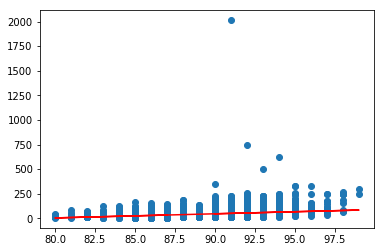

In [8]:
plt.scatter(x, y)  
plt.plot(x,predict,color = 'red')
plt.show()

From this linear regression, we can see that there is a slight correlation between the price of the wine and its rating. The low R^2 value shows that this linear regression is not so good though. 

Run linear regression on the wine's vintage to price to see if there is any correlation

0.0012341733580448766


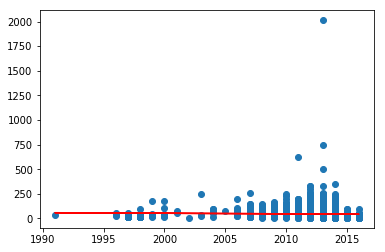

In [9]:
x = data.loc[:, ['vintage']]
y = data.loc[:, ['price']]

reg = LinearRegression().fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x, y)  
plt.plot(x,predict,color = 'red')
plt.show()

0.019237457788118695


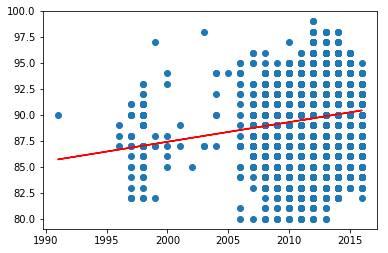

In [10]:
x = data.loc[:, ['vintage']]
y = data.loc[:, ['points']]

reg = LinearRegression().fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x, y)  
plt.plot(x,predict,color = 'red')
plt.show()

Here, the linear regressions between the vintage and the price of the wine and vintage and the rating of the wine show no correlation.

0.14027169863723965


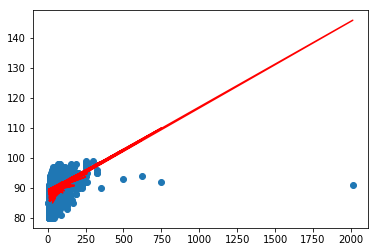

In [11]:
x = data.loc[:, ['vintage', 'price']]
y = data.loc[:, ['points']]

reg = LinearRegression().fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x.iloc[:,1], y)  
plt.plot(x.iloc[:,1],predict,color = 'red')
plt.show()

Here, we try to run linear regression on 2 input features, and get a decent correlation between the vintage and price  to the ratings of the wine.

run linear regression on normalized values

In [9]:
# Normalizing province id between 1 and 0 
data['norm_vintage'] = abs((data.vintage - data.vintage.min()) / (data.vintage.max()))
# Normalizing price between 1 and 0 
data['norm_price'] = abs((data.price - data.price.min()) / (data.price.max()))
# Normalizing points(rating) between 1 and 0 
data['norm_points'] = abs((data.points - data.points.min()) / (data.points.max()))

0.0012341733580445435


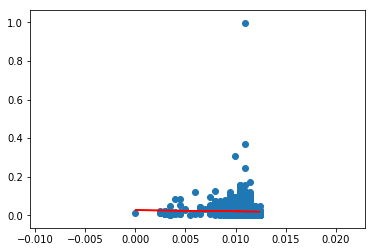

In [10]:
x = data.loc[:, ['norm_vintage']]
y = data.loc[:, ['norm_price']]

reg = LinearRegression().fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x, y)  
plt.plot(x,predict,color = 'red')
plt.show()

In [17]:
import pandas as pd
df_fire = pd.read_csv('../data/clean_fire.csv', sep=',')
df_fire.head()

,Unnamed: 0,Unnamed: 0.1,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,0,0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,63.0,Plumas,NaN
1,1,1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,61.0,Placer,NaN
2,2,2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,17.0,El Dorado,NaN
3,3,3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,3.0,Alpine,NaN
4,4,4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,3.0,Alpine,NaN


In [21]:
df_fire.dropna(subset = ['FIRE_YEAR', 'FIPS_NAME', 'FIRE_SIZE'], inplace = True)
print(df_fire.shape)
df_fire = df_fire.loc[:,['FIRE_YEAR', 'FIPS_NAME', 'FIRE_SIZE']]
df_fire.head()

,FIRE_YEAR,FIPS_NAME,FIRE_SIZE
0,2005,Plumas,0.10
1,2004,Placer,0.25
2,2004,El Dorado,0.10
3,2004,Alpine,0.10
4,2004,Alpine,0.10


In [27]:
print(df_fire.shape)

(56221, 3)


In [34]:

fire_dict = dict()
for index, row in df_fire.iterrows():
    if row['FIPS_NAME'] in fire_dict:
        fire_dict[row['FIPS_NAME']] += 1
    else:
        fire_dict[row['FIPS_NAME']] = 1
    

fire_dict = sorted(fire_dict.items(), key=lambda kv: kv[1])
fire_dict = list(reversed(fire_dict))
fire_dict

[('Riverside', 6925),
 ('Los Angeles', 2703),
 ('El Dorado', 2676),
 ('San Bernardino', 2642),
 ('San Diego', 2443),
 ('Fresno', 2183),
 ('Siskiyou', 2156),
 ('Shasta', 2118),
 ('Butte', 1768),
 ('Kern', 1737),
 ('Placer', 1689),
 ('Lassen', 1552),
 ('Tuolumne', 1508),
 ('Madera', 1406),
 ('Merced', 1270),
 ('Nevada', 1260),
 ('Trinity', 1255),
 ('Modoc', 1149),
 ('Plumas', 1144),
 ('Calaveras', 1085),
 ('Humboldt', 1047),
 ('Tehama', 1005),
 ('Mendocino', 908),
 ('Tulare', 827),
 ('Sonoma', 730),
 ('San Luis Obispo', 726),
 ('Mono', 673),
 ('Monterey', 660),
 ('Lake', 599),
 ('Amador', 591),
 ('Yuba', 541),
 ('Sierra', 507),
 ('Contra Costa', 494),
 ('Mariposa', 486),
 ('Santa Cruz', 449),
 ('Napa', 449),
 ('Sacramento', 442),
 ('Inyo', 442),
 ('Orange', 417),
 ('Santa Clara', 363),
 ('Alpine', 337),
 ('San Joaquin', 306),
 ('Alameda', 301),
 ('Stanislaus', 255),
 ('Del Norte', 238),
 ('Yolo', 237),
 ('Santa Barbara', 236),
 ('San Mateo', 196),
 ('Imperial', 175),
 ('San Benito', 157)

In [31]:
wine_dict = dict()
for index, row in data.iterrows():
    if row['region_1'] in wine_dict:
        wine_dict[row['region_1']] += 1
    else:
        wine_dict[row['region_1']] = 1
    

wine_dict = sorted(wine_dict.items(), key=lambda kv: kv[1])
wine_dict = list(reversed(wine_dict))
wine_dict

[('Russian River Valley', 1292),
 ('Napa Valley', 1140),
 ('Paso Robles', 921),
 ('Sonoma Coast', 606),
 ('Sta. Rita Hills', 516),
 ('California', 489),
 ('Lodi', 453),
 ('Santa Lucia Highlands', 338),
 ('Carneros', 333),
 ('Santa Barbara County', 325),
 ('Santa Ynez Valley', 318),
 ('Santa Maria Valley', 317),
 ('Livermore Valley', 307),
 ('Dry Creek Valley', 299),
 ('Sonoma County', 295),
 ('Sierra Foothills', 282),
 ('Santa Cruz Mountains', 274),
 ('Sonoma Valley', 220),
 ('Alexander Valley', 216),
 ('Amador County', 203),
 ('El Dorado', 198),
 ('Edna Valley', 159),
 ('Central Coast', 145),
 ('Rutherford', 128),
 ('North Coast', 123),
 ('St. Helena', 114),
 ('Temecula Valley', 110),
 ('Green Valley', 109),
 ('Arroyo Seco', 100),
 ('Monterey', 100),
 ('Adelaida District', 91),
 ('Santa Clara Valley', 90),
 ('Oakville', 82),
 ('Shenandoah Valley (CA)', 79),
 ('Monterey County', 79),
 ('Sonoma Mountain', 75),
 ('Calistoga', 71),
 ('San Luis Obispo County', 68),
 ('Happy Canyon of Santa

In [24]:
#df_fire.to_csv('../data/clean_fire.csv')
data['total_fires'] = 0
data['sum_fire_size'] = 0
data.head()

,Unnamed: 0,Unnamed: 0.1,country,description,designation,points,price,province,region_1,region_2,...,variety,winery,province_id,variety_numerical,vintage,norm_vintage,norm_price,norm_points,total_fires,sum_fire_size
0,10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,...,Cabernet Sauvignon,Kirkland Signature,7,80,2011,0.009921,0.006955,0.070707,0,0
3,23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,...,Merlot,Bianchi,7,326,2011,0.009921,0.008445,0.070707,0,0
4,25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,...,Pinot Noir,Castello di Amorosa,7,440,2011,0.009921,0.031793,0.070707,0,0
12,60,60,US,"Syrupy and dense, this wine is jammy in plum a...",Estate,86,100.0,California,Napa Valley,Napa,...,Cabernet Sauvignon,Okapi,7,80,2013,0.010913,0.047193,0.060606,0,0
13,63,64,US,There are intriguing touches to the nose of th...,Golden Horn,86,26.0,California,Santa Ynez Valley,Central Coast,...,Sauvignon Blanc,Sevtap,7,514,2015,0.011905,0.010432,0.060606,0,0


In [44]:
# want # of fires in the previous year
#  sum of all fire sizes
data['total_fires'] = 0
data['sum_fire_size'] = 0

for w_index, w_row in data.iterrows():
    for key in fire_dict:
        if(key[0].lower() in w_row['region_1'].lower()):
            query = 'FIPS_NAME == \"' + str(key[0]) + '\" and FIRE_YEAR == ' + str(w_row['vintage']-1)
            print(query)
            fire_data = df_fire.query(query)
            for f_index, f_row in fire_data.iterrows():
                data.loc[w_index, 'total_fires'] += 1
                data.loc[w_index, 'sum_fire_size'] += fire_data.loc[f_index, 'FIRE_SIZE']
            

    

FIPS_NAME == "Napa" and FIRE_YEAR == 2010
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2010
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Santa Clara" and FIRE_YEAR == 2013
FIPS_NAME == "Monterey" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Nevada" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2007
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2011
FIPS_NAME == "El Dorado" and FIRE_YEAR == 2009
FIPS_NAME == "Napa" and FIRE_YEAR == 2013
FIPS_NAME == "Monterey" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Calaveras" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEA

FIPS_NAME == "Sierra" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2013
FIPS_NAME == "El Dorado" and FIRE_YEAR == 2013
FIPS_NAME == "San Luis Obispo" and FIRE_YEAR == 2012
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Sierra" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Santa Cruz" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2013
FIPS_NAME == "San Luis Obispo" and FIRE_YEAR == 2014
FIPS_NAME == "Monterey" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2009
FIPS_NAME == "Santa Cruz" and FIRE_YEAR == 2012
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2014
FIPS_NAME == "Napa" and FIRE_YEAR == 2010
FIPS_NAM

FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2011
FIPS_NAME == "Amador" and FIRE_YEAR == 2009
FIPS_NAME == "Santa Clara" and FIRE_YEAR == 2012
FIPS_NAME == "Santa Cruz" and FIRE_YEAR == 2011
FIPS_NAME == "Amador" and FIRE_YEAR == 2011
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2014
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2015
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Santa Cruz" and FIRE_YEAR == 2009
FIPS_NAME == "San Luis Obispo" and FIRE_YEAR == 2012
FIPS_NAME == "Sierra" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Napa" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2011
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2014
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2009
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2014

FIPS_NAME == "Monterey" and FIRE_YEAR == 2014
FIPS_NAME == "Napa" and FIRE_YEAR == 2014
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2012
FIPS_NAME == "San Luis Obispo" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Sierra" and FIRE_YEAR == 2008
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2015
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2015
FIPS_NAME == "Sierra" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2014
FIPS_NAME == "San Francisco" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2014
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2011
FIPS_NAME == "Napa" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "El Dorado" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2010
FIPS_NAME == "Calaveras" and FIRE_YEAR == 2011
FIPS_NAME == "Napa" and FIRE_YEAR 

FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2013
FIPS_NAME == "Sierra" and FIRE_YEAR == 2011
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2014
FIPS_NAME == "Amador" and FIRE_YEAR == 2009
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Sierra" and FIRE_YEAR == 2010
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Amador" and FIRE_YEAR == 2012
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Monterey" and FIRE_YEAR == 2011
FIPS_NAME == "Contra Costa" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Santa Cruz" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Monterey" and FIRE_YEAR == 2011
FIPS_NAME == "Mendocino" and FIRE_YEAR == 2011
FIPS_NAME == "Lake" and FIRE_YEAR == 2011
FIPS_NAME == "Santa Cruz" and FIRE_YEAR == 2011
FIPS_NA

FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Monterey" and FIRE_YEAR == 2014
FIPS_NAME == "Santa Clara" and FIRE_YEAR == 2012
FIPS_NAME == "Santa Cruz" and FIRE_YEAR == 2013
FIPS_NAME == "Sierra" and FIRE_YEAR == 2009
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Amador" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Napa" and FIRE_YEAR == 2010
FIPS_NAME == "Napa" and FIRE_YEAR == 2010
FIPS_NAME == "Madera" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Santa Cruz" and FIRE_YEAR == 2011
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Sonoma" and FI

FIPS_NAME == "Napa" and FIRE_YEAR == 2010
FIPS_NAME == "Napa" and FIRE_YEAR == 2010
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2011
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2011
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2014
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "El Dorado" and FIRE_YEAR == 2008
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2014
FIPS_NAME == "Contra Costa" and FIRE_YEAR == 2009
FIPS_NAME == "Santa Clara" and FIRE_YEAR == 2012
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2013
FIPS_NAME == "San Francisco" and FIRE_YEAR == 2010
FIPS_NAME == "Santa Cruz" and FIRE_YEAR == 2013
FIPS_NAME == "Santa Cruz" and FIRE_YEAR == 2013
FIPS_NAME == "Santa Clara" and FIRE_YEAR == 2011
FIPS_

FIPS_NAME == "Amador" and FIRE_YEAR == 2010
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2015
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2014
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2014
FIPS_NAME == "Napa" and FIRE_YEAR == 2015
FIPS_NAME == "Napa" and FIRE_YEAR == 2010
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2010
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2010
FIPS_NAME == "Santa Cruz" and FIRE_YEAR == 2013
FIPS_NAME == "San Luis Obispo" and FIRE_YEAR == 2012
FIPS_NAME == "San Luis Obispo" and FIRE_YEAR == 2013
FIPS_NAME == "El Dorado" and FIRE_YEAR == 2010
FIPS_NAME == "Mendocino" and FIRE_YEAR == 2013
FIPS_NAME == "Lake" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2010
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Contra Costa" and FIRE_YEAR == 2008
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2014
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2011
FIPS_NAME == "Sierra" and FIRE_YEAR == 2010
FIPS_NAME == "Napa" and FIRE_YEAR ==

FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Monterey" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2014
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2015
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2015
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2011
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Monterey" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2011
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "San Benito" and FIRE_YEAR == 2009
FIPS_NAME == "Sierra" and FIRE_YEAR == 2011
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Marin" and FIRE_YEAR == 2012
FIPS_NAME == "San Lu

FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Sierra" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2013
FIPS_NAME == "Sierra" and FIRE_YEAR == 2012
FIPS_NAME == "Amador" and FIRE_YEAR == 2013
FIPS_NAME == "Santa Clara" and FIRE_YEAR == 2012
FIPS_NAME == "Sierra" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2013
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Marin

FIPS_NAME == "Santa Cruz" and FIRE_YEAR == 2014
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2013
FIPS_NAME == "Sierra" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2014
FIPS_NAME == "Sierra" and FIRE_YEAR == 2012
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Amador" and FIRE_YEAR == 2009
FIPS_NAME == "San Francisco" and FIRE_YEAR == 2008
FIPS_NAME == "Sierra" and FIRE_YEAR == 2013
FIPS_NAME == "Monterey" and FIRE_YEAR == 2014
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2011
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2011
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2011
FIPS_NAME == "Napa" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2011
FIPS_NAME == "El Dorado" and FIRE_YEAR == 2011
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2011
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2008
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2011
FIPS_NAME == "Napa" and FIRE_YEAR == 2014
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012

FIPS_NAME == "Sonoma" and FIRE_YEAR == 2010
FIPS_NAME == "Napa" and FIRE_YEAR == 2009
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2011
FIPS_NAME == "El Dorado" and FIRE_YEAR == 2007
FIPS_NAME == "Santa Cruz" and FIRE_YEAR == 2013
FIPS_NAME == "Monterey" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Sierra" and FIRE_YEAR == 2009
FIPS_NAME == "Contra Costa" and FIRE_YEAR == 2009
FIPS_NAME == "Amador" and FIRE_YEAR == 2012
FIPS_NAME == "Amador" and FIRE_YEAR == 2009
FIPS_NAME == "San Luis Obispo" and FIRE_YEAR == 2011
FIPS_NAME == "Napa" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "El Dorado" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2015
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2014
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2014
FIPS_NAME == "Son

FIPS_NAME == "Sonoma" and FIRE_YEAR == 2010
FIPS_NAME == "Napa" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2013
FIPS_NAME == "Monterey" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Amador" and FIRE_YEAR == 2012
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 1997
FIPS_NAME == "Napa" and FIRE_YEAR == 1996
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2011
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2011
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Santa Barbara" and FIRE_YEAR 

FIPS_NAME == "Napa" and FIRE_YEAR == 2014
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2011
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2008
FIPS_NAME == "Napa" and FIRE_YEAR == 2008
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Sierra" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2013
FIPS_NAME == "Monterey" and FIRE_YEAR == 2011
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2010
FIPS_NAME == "Santa Cruz" and FIRE_YEAR == 2012
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2009
FIPS_NAME == "Santa Cruz" and FIRE_YEAR == 2011
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "San Luis Obispo" and FIRE_YEAR == 2014
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Sonoma" and FIRE_YEAR ==

FIPS_NAME == "Santa Cruz" and FIRE_YEAR == 2012
FIPS_NAME == "Marin" and FIRE_YEAR == 2011
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2011
FIPS_NAME == "Santa Cruz" and FIRE_YEAR == 2012
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2009
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Santa Cruz" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Amador" and FIRE_YEAR == 2006
FIPS_NAME == "Amador" and FIRE_YEAR == 2006
FIPS_NAME == "Sierra" and FIRE_YEAR == 2009
FIPS_NAME == "Monterey" and FIRE_YEAR == 2011
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2010
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "El Dorado" and FIRE_YEAR == 2007
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2013
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2013
FIPS_NAME == "Solano" and FIRE_YEAR == 201

FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Amador" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2013
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2010
FIPS_NAME == "Santa Clara" and FIRE_YEAR == 2008
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2014
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2015
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2012
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2011
FIPS_NAME == "San Luis Obispo" and FIRE_YEAR == 2011
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2014
FIPS_NAME == "Napa" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2014
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2014
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Santa Cruz" and FIRE_YEAR =

FIPS_NAME == "Sierra" and FIRE_YEAR == 2010
FIPS_NAME == "Napa" and FIRE_YEAR == 2015
FIPS_NAME == "Monterey" and FIRE_YEAR == 2012
FIPS_NAME == "El Dorado" and FIRE_YEAR == 2012
FIPS_NAME == "San Luis Obispo" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Monterey" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2015
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2010
FIPS_NAME == "Napa" and FIRE_YEAR == 2007
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2011
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2011
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2014
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FI

FIPS_NAME == "Napa" and FIRE_YEAR == 2013
FIPS_NAME == "Sierra" and FIRE_YEAR == 2015
FIPS_NAME == "Napa" and FIRE_YEAR == 2015
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2014
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Sierra" and FIRE_YEAR == 2010
FIPS_NAME == "Santa Cruz" and FIRE_YEAR == 2010
FIPS_NAME == "San Luis Obispo" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Santa Cruz" and FIRE_YEAR == 2011
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Santa Clara" and FIRE_YEAR == 2011
FIPS_NAME == "Sierra" and FIRE_YEAR == 2008
FIPS_NAME == "Sierra" and FIRE_YEAR == 2008
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2013
FIPS_NAME == "Sierra" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2015
FIPS_NAME == "Nap

FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2014
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2011
FIPS_NAME == "Amador" and FIRE_YEAR == 2007
FIPS_NAME == "Sierra" and FIRE_YEAR == 2008
FIPS_NAME == "Sierra" and FIRE_YEAR == 2011
FIPS_NAME == "El Dorado" and FIRE_YEAR == 2009
FIPS_NAME == "Monterey" and FIRE_YEAR == 2011
FIPS_NAME == "El Dorado" and FIRE_YEAR == 2011
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "San Benito" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2011
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2014
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2014
FIPS_NAME == "Sierra" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2010
FIPS_NAME == "Santa Cruz" and FIRE_YEAR == 2012
FIPS_NAME == "El Dorado" and FIRE_YEAR == 2013
FIPS_NAME == "Santa Cruz" and FIRE_YEAR == 2012
FIPS_NAME == "Monterey" and FIRE_YEAR == 2014
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2014
FIPS_N

FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2010
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2011
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2008
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Amador" and FIRE_YEAR == 2011
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2014
FIPS_NAME == "Santa Clara" and FIRE_YEAR == 2011
FIPS_NAME == "Napa" and FIRE_YEAR == 2013
FIPS_NAME == "El Dorado" and FIRE_YEAR == 2006
FIPS_NAME == "Sierra" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "San Luis Obispo" and FIRE_YEAR == 2011
FIPS_NAME == "Napa" and FIRE_YEAR == 1999
FIPS_NAME == "Santa Cruz" and FIRE_YEAR == 1998
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2012
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2008
FIPS_NAME == "El Dorado" and FIRE_YEAR == 2009
FIPS_NAME == "S

FIPS_NAME == "Sonoma" and FIRE_YEAR == 2011
FIPS_NAME == "El Dorado" and FIRE_YEAR == 2010
FIPS_NAME == "Santa Cruz" and FIRE_YEAR == 2012
FIPS_NAME == "Santa Cruz" and FIRE_YEAR == 2010
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2009
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2012
FIPS_NAME == "Contra Costa" and FIRE_YEAR == 2011
FIPS_NAME == "Amador" and FIRE_YEAR == 2008
FIPS_NAME == "Contra Costa" and FIRE_YEAR == 2015
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Amador" and FIRE_YEAR == 2013
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2014
FIPS_NAME == "El Dorado" and FIRE_YEAR == 1997
FIPS_NAME == "El Dorado" and FIRE_YEAR == 1996
FIPS_NAME == "Amador" and FIRE_YEAR == 1997
FIPS_NAME == "Sonoma" and FIRE_YEAR == 1997
FIPS_NAME == "Sonoma" and FIRE_YEAR == 1996
FIPS_NAME == "El Dorado" and FIRE_YEAR == 2008
FIPS_NAME == "Sierra" and FIRE_YEAR == 2002
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2011
FIPS_NAME == "Sonoma" and FIRE_YEA

FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Santa Cruz" and FIRE_YEAR == 2012
FIPS_NAME == "Monterey" and FIRE_YEAR == 2011
FIPS_NAME == "Monterey" and FIRE_YEAR == 2011
FIPS_NAME == "Santa Cruz" and FIRE_YEAR == 2011
FIPS_NAME == "Napa" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "San Luis Obispo" and FIRE_YEAR == 2012
FIPS_NAME == "Santa Cruz" and FIRE_YEAR == 2010
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Calaveras" and FIRE_YEAR == 2005
FIPS_NAME == "El Dorado" and FIRE_YEAR == 2014
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2012
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2014
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Marin" and FIRE_YEAR == 2011
FIPS_NAME == "Sierra" and FIRE_YEAR == 2013
FIPS_NAME == "Sierra" and FIRE_YEAR == 2015
FIPS_NAME == "Santa Cruz" and FIRE_YEAR == 2014
F

FIPS_NAME == "Sonoma" and FIRE_YEAR == 2010
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Calaveras" and FIRE_YEAR == 2009
FIPS_NAME == "Calaveras" and FIRE_YEAR == 2009
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2015
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2012
FIPS_NAME == "San Benito" and FIRE_YEAR == 2011
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2009
FIPS_NAME == "Monterey" and FIRE_YEAR == 2011
FIPS_NAME == "Santa Cruz" and FIRE_YEAR == 2014
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2012
FIPS_NAME == "San Luis Obispo" and FIRE_YEAR == 2012
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2011
FIPS_NAME == "Napa" and FIRE_YEAR == 2010
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2011
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2011
F

FIPS_NAME == "Sierra" and FIRE_YEAR == 2005
FIPS_NAME == "El Dorado" and FIRE_YEAR == 2007
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "San Luis Obispo" and FIRE_YEAR == 2010
FIPS_NAME == "San Luis Obispo" and FIRE_YEAR == 2012
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2011
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "Monterey" and FIRE_YEAR == 2015
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Santa Barbara" and FIRE_YEAR == 2014
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2011
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2013
FIPS_NAME == "Sonoma" and FIRE_YEAR == 2012
FIPS_NAME == "Napa" and FIRE_YEAR == 2009
FIPS_NAME == "Amador" and FIRE_YEAR == 2015
FIPS_NAME == "Napa" and FIRE_YEAR == 2013
FIPS_NAME == "Napa" and FIRE_YEAR == 2012
FIPS_NAME == "

In [45]:
wine_dict = dict()
for index, row in data.iterrows():
    if row['total_fires'] in wine_dict:
        wine_dict[row['total_fires']] += 1
    else:
        wine_dict[row['total_fires']] = 1
    

wine_dict = sorted(wine_dict.items(), key=lambda kv: kv[1])
wine_dict = list(reversed(wine_dict))
wine_dict

[(0, 8668),
 (113, 363),
 (50, 363),
 (230, 341),
 (54, 336),
 (93, 303),
 (77, 200),
 (33, 147),
 (118, 113),
 (29, 112),
 (14, 108),
 (1, 94),
 (68, 82),
 (40, 68),
 (108, 64),
 (53, 63),
 (86, 63),
 (121, 59),
 (59, 53),
 (94, 50),
 (26, 49),
 (257, 48),
 (6, 45),
 (231, 41),
 (48, 38),
 (9, 33),
 (35, 33),
 (97, 29),
 (183, 29),
 (112, 28),
 (11, 28),
 (99, 28),
 (37, 27),
 (2, 26),
 (160, 26),
 (66, 24),
 (56, 23),
 (24, 23),
 (105, 23),
 (72, 22),
 (116, 21),
 (126, 19),
 (51, 17),
 (98, 15),
 (7, 13),
 (89, 13),
 (60, 13),
 (81, 13),
 (215, 12),
 (63, 12),
 (42, 11),
 (28, 11),
 (17, 11),
 (12, 11),
 (67, 10),
 (38, 9),
 (19, 8),
 (80, 8),
 (10, 8),
 (114, 7),
 (44, 7),
 (273, 7),
 (25, 6),
 (3, 6),
 (15, 6),
 (5, 6),
 (31, 5),
 (163, 5),
 (139, 4),
 (8, 4),
 (102, 4),
 (177, 4),
 (147, 4),
 (47, 4),
 (30, 4),
 (18, 4),
 (220, 4),
 (307, 3),
 (46, 3),
 (84, 3),
 (145, 3),
 (222, 2),
 (256, 2),
 (45, 2),
 (207, 2),
 (267, 1),
 (172, 1),
 (92, 1),
 (415, 1),
 (4, 1),
 (397, 1),
 (

In [46]:
#data.to_csv('../data/California_latlng_merged.csv')

In [56]:
data = data[(data != 0).all(1)]
data.shape

(12635, 23)

0.008883072216390397


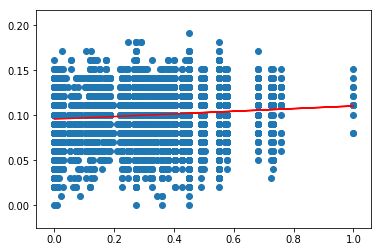

In [24]:
data = pd.read_csv("../data/California_latlng_merged.csv")
data['norm_fires'] = abs((data.total_fires - data.total_fires.min()) / (data.total_fires.max()))
data['norm_points'] = abs((data.points - data.points.min()) / (data.points.max()))
x = data.loc[:, ['norm_fires']]
y = data.loc[:, ['norm_points']]

reg = LinearRegression().fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x, y)
plt.plot(x,predict,color = 'red')
plt.show()

0.011197402352888353


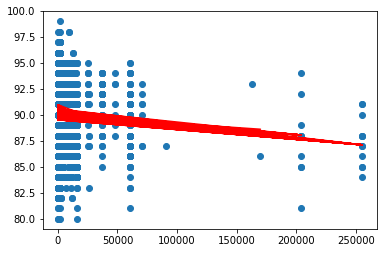

In [22]:
x = data.loc[:, ['total_fires', 'sum_fire_size']]
y = data.loc[:, ['points']]

reg = LinearRegression().fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x.iloc[:,1], y)  
plt.plot(x.iloc[:,1],predict,color = 'red')
plt.show()

# Analysis/Conclusion

In this homework we combined our current Wine dataset with a dataset we found that contains wild fire data. With this new dataset we were hopping to find a correlation between fires in the regions near where the wine is made, and points. However, to do this we needed to join the two datasets and there were no forgein keys that we could easily use to join. So what we did was take the name of the county where the fire happened and used that key to join on in the wine dataset. So we joined the two datasets based on row values. While doing this we also generated 2 new columns that kept count of the number of fires in a location the year before the wine was made, used vintage to do this. 

Once we had our new combined dataset, we ran linear regression on the data looking for correlations between the wine dataset and fire datasets.

